In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Reshape, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import register_keras_serializable
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib

import warnings
warnings.filterwarnings('ignore')
import joblib

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [ ]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [ ]:
variable_expenses = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]

target_columns = [f'Potential_Savings_{cat}' for cat in variable_expenses]

numerical_features = [
    'Income', 'Age', 'Dependents', 'Disposable_Income', 'Desired_Savings'
] + variable_expenses

categorical_features = ['Occupation', 'City_Tier']

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_cat_columns = encoder.get_feature_names_out(categorical_features)

df_encoded_cats = pd.DataFrame(encoded_cats, columns=encoded_cat_columns)
df_features = pd.concat([df[numerical_features], df_encoded_cats], axis=1)

In [ ]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_features[numerical_features])

df_scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical_features, index=df_features.index)
df_features.update(df_scaled_numerical)

In [ ]:
X = df_features

y = df[target_columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
@register_keras_serializable()
class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name='att_weight', shape=(input_shape[-1], input_shape[-1]),
            initializer='glorot_uniform', trainable=True
        )
        self.b = self.add_weight(
            name='att_bias', shape=(input_shape[-1],),
            initializer='zeros', trainable=True
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = tf.tanh(tf.matmul(x, self.W) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = x * a
        return tf.reduce_sum(output, axis=1)

    def get_config(self):
        return super(AttentionLayer, self).get_config()

In [ ]:
input_dim = X_train.shape[1]  # 17
input_layer = Input(shape=(input_dim,))

dense1 = Dense(128, activation='relu')(input_layer)
dense1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.3)(dense1)
reshaped = Reshape((128, 1))(dropout1)
attention_output = AttentionLayer()(reshaped)
dense2 = Dense(64, activation='relu')(attention_output)
dense2 = BatchNormalization()(dense2)
dropout2 = Dropout(0.3)(dense2)
dense3 = Dense(32, activation='relu')(dropout2)
output_layer = Dense(len(target_columns), activation='linear')(dense3)

model = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

NameError: name 'mean_squared_error' is not defined

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 398315.1250 - mae: 322.5492 - val_loss: 364921.1250 - val_mae: 301.9748 - learning_rate: 0.0010
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 260742.5938 - mae: 245.9933 - val_loss: 166822.1875 - val_mae: 189.9206 - learning_rate: 0.0010
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 121232.5703 - mae: 170.5491 - val_loss: 88043.5078 - val_mae: 145.8632 - learning_rate: 0.0010
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 85974.1953 - mae: 151.4939 - val_loss: 80773.7500 - val_mae: 139.7831 - learning_rate: 0.0010
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 77744.6172 - mae: 143.3995 - val_loss: 75706.5234 - val_mae: 132.0340 - learning_rate: 0.0010
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 80777.5234 - mae: 140.4999 - val_loss: 81061.1484 - val_mae: 131.6149 - learning_rate: 0.0010
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8127

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78621.3203 - mae: 133.5723
Test Loss: 84667.7500
Test MAE: 131.6760


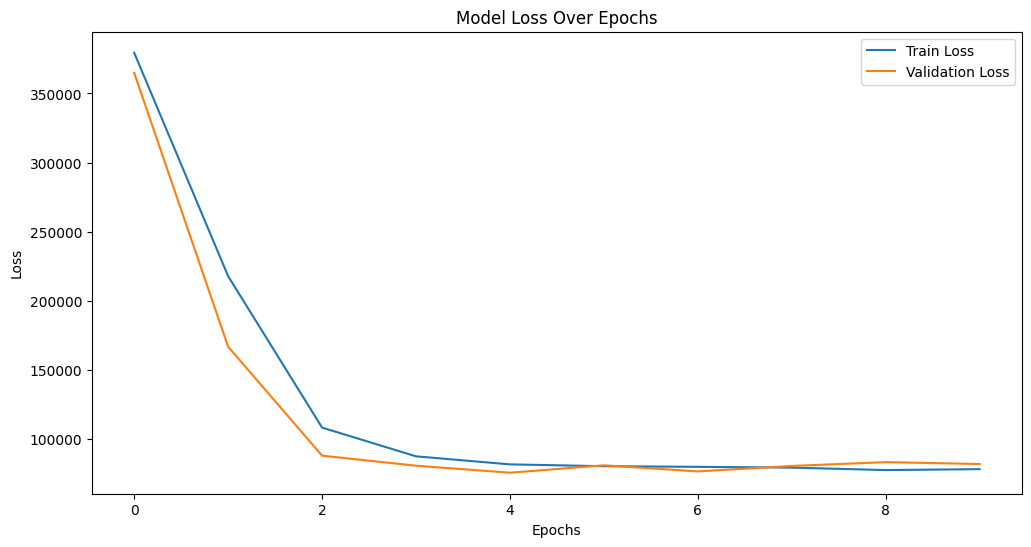

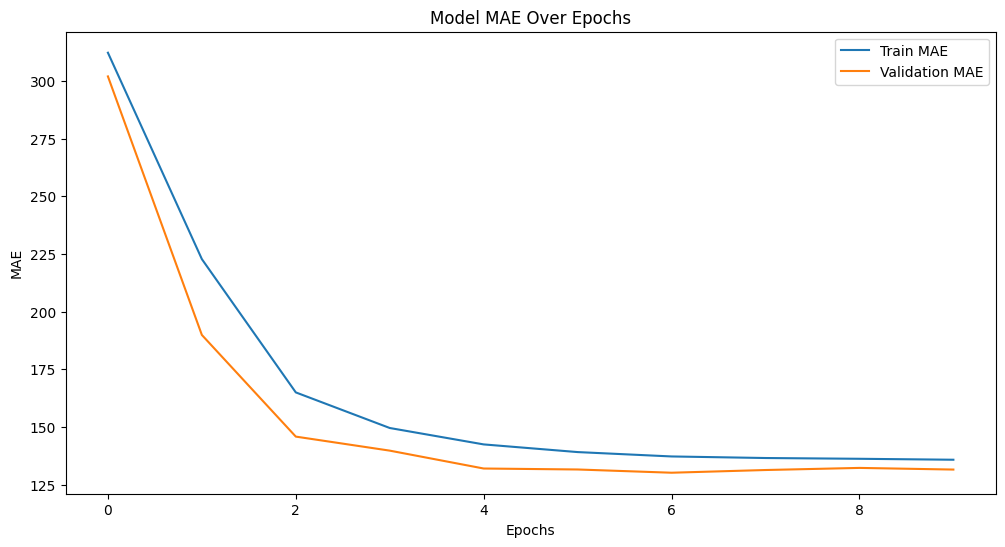

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

y_test_df = pd.DataFrame(y_test, columns=target_columns).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

from sklearn.metrics import mean_absolute_error

mae_per_category = {}
for col in target_columns:
    mae = mean_absolute_error(y_test_df[col], y_pred_df[col])
    mae_per_category[col] = mae
    print(f"MAE for {col}: {mae:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE for Potential_Savings_Groceries: 353.8272
MAE for Potential_Savings_Transport: 187.2437
MAE for Potential_Savings_Eating_Out: 105.9177
MAE for Potential_Savings_Entertainment: 103.9666
MAE for Potential_Savings_Utilities: 171.6965
MAE for Potential_Savings_Healthcare: 21.8832
MAE for Potential_Savings_Education: 46.0584
MAE for Potential_Savings_Miscellaneous: 62.8145


In [ ]:
sample_input = X_test.iloc[0].values
sample_input = np.expand_dims(sample_input, axis=0)

In [ ]:
prediction = model.predict(sample_input)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
[[623.0141   334.99545  178.21564  179.39879  310.61008   27.814676
   44.23529  101.93762 ]]


In [ ]:
model.save('savings_model.h5')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')

print("Model and preprocessing objects saved successfully.")

['scaler.pkl']

2.18.0
